In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
inpDir = '../../Classwork\input'
outDir = '..\Day1'

random_state= 24
np.random.seed(random_state)
rng = np.random.default_rng(seed = random_state)

params ={'legend.fontsize':'medium',
        'figure.figsize':(15,8),
        'axes.labelsize':'large',
        'axes.titlesize':'large',
        'xtick.labelsize':'large',
        'ytick.labelsize':'large'}

plt.rcParams.update(params)

cmap = plt.cm.coolwarm

In [3]:
df = pd.read_csv(os.path.join(inpDir,'breast_cancer_mod.csv'))
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
565,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
566,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
567,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.00000,569.000000
mean,0.820738,0.880492,0.827768,0.954306,0.811951,0.910369,0.917399,0.899824,0.831283,0.927944,...,0.790861,0.868190,0.966608,0.762742,0.942004,0.926186,0.678383,0.956063,0.97891,0.627417
std,0.383909,0.324671,0.377914,0.209005,0.391095,0.285904,0.275520,0.300498,0.374831,0.258809,...,0.407052,0.338582,0.179816,0.425776,0.233942,0.261698,0.467508,0.205135,0.14381,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


<Axes: xlabel='target'>

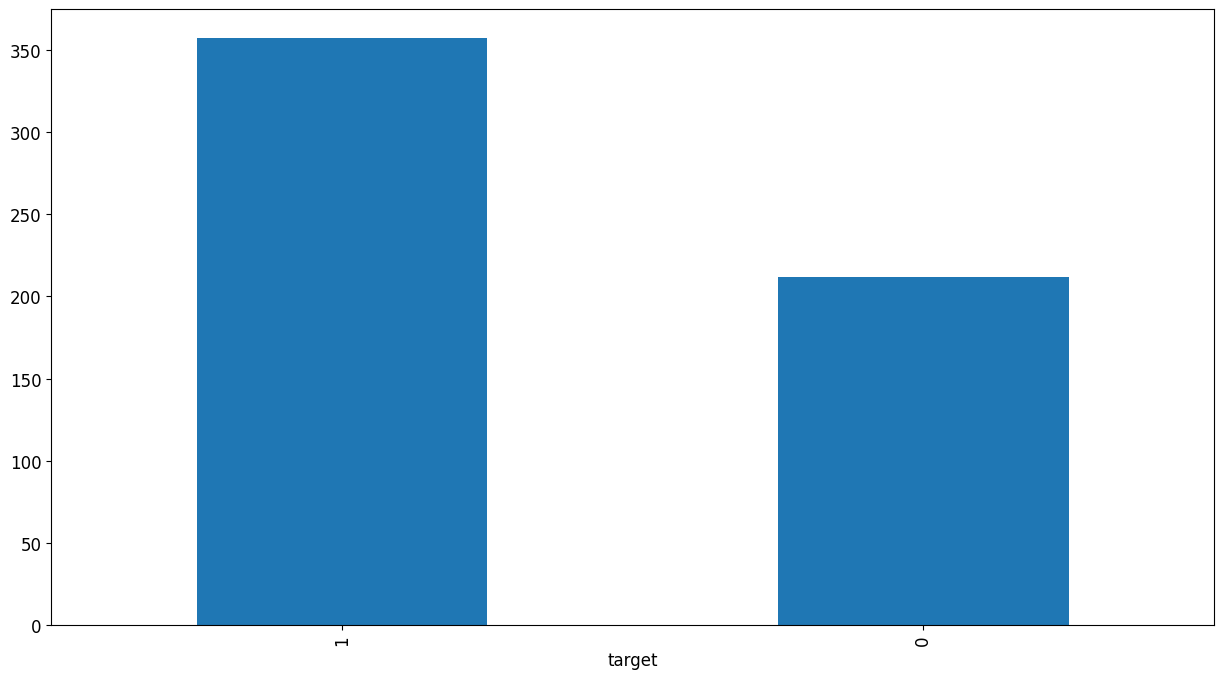

In [7]:
fig,ax = plt.subplots()
df['target'].value_counts().plot(kind='bar')

In [8]:
test_size = 0.2
features = df.drop('target',axis=1)
labels = df['target']
X_train,X_test, y_train, y_test = train_test_split(features,labels,test_size=test_size,random_state=random_state)

In [9]:
X_train['total'] = X_train.sum(axis=1)
X_train['target'] = y_train
X_train.sort_values('total',inplace=True)
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
8,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,15,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
512,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
543,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
479,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1


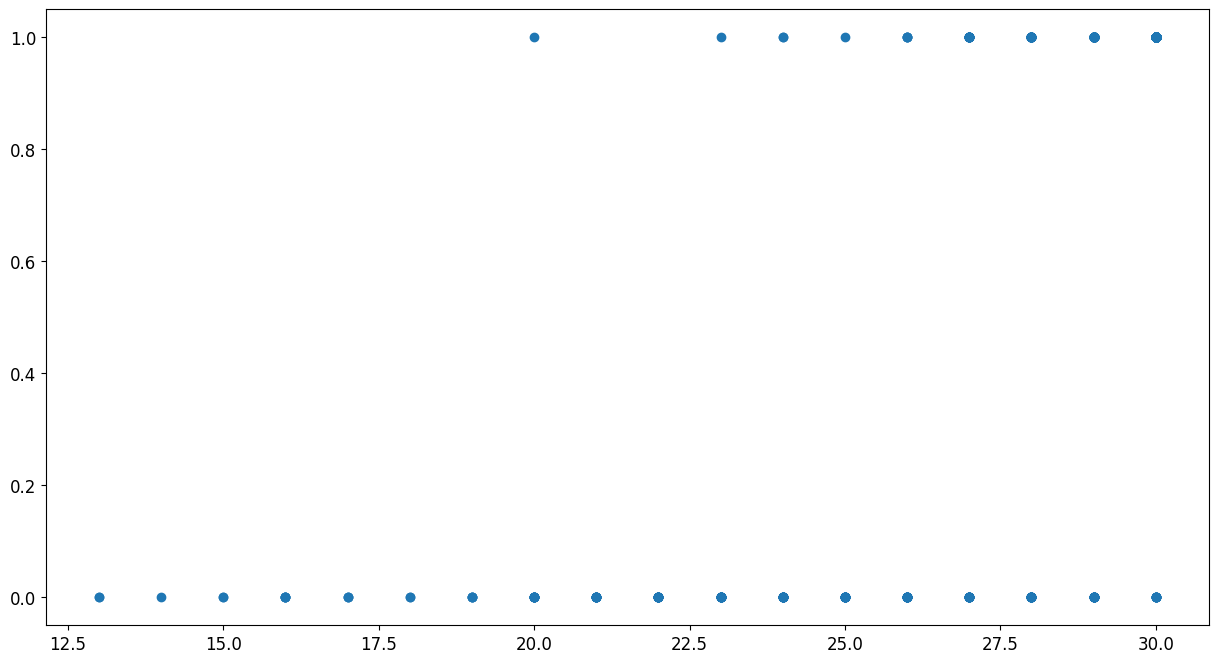

In [10]:
plt.scatter(X_train['total'],X_train['target'])

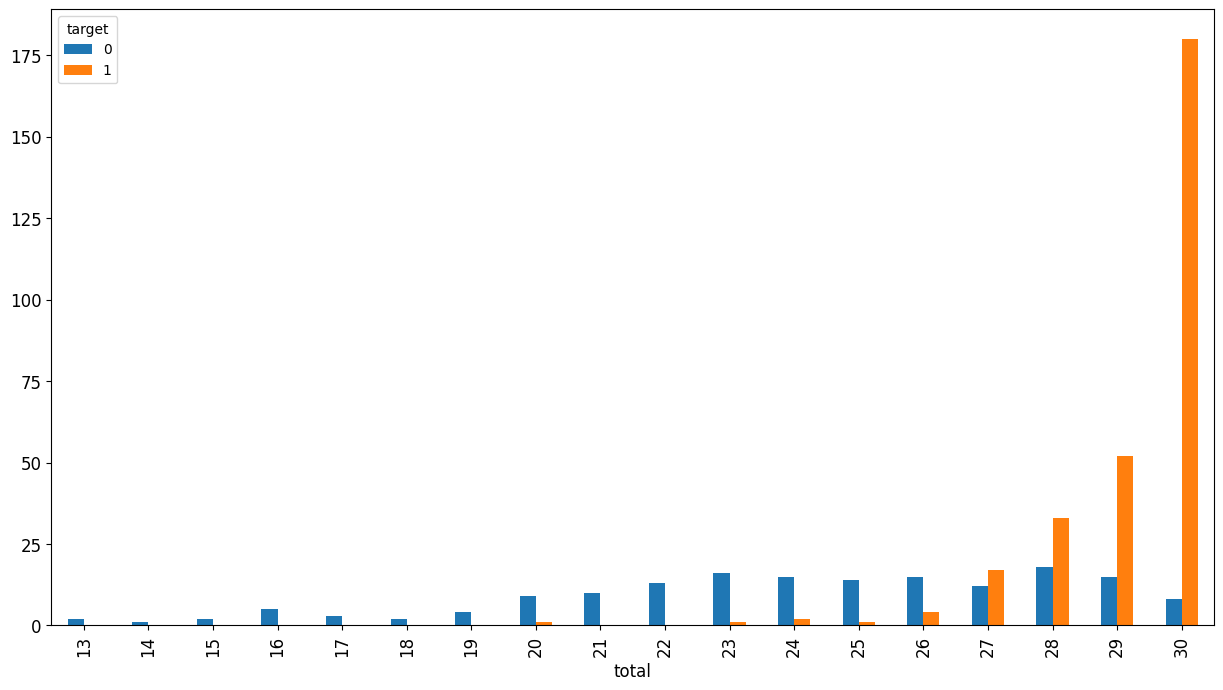

In [11]:
tmp_df = X_train.groupby(['total','target']).agg({'target':'count'})
tmp_df.columns=['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total',columns='target',values='count').plot(kind='bar');

In [12]:
tmp_df

,total,target,count
0,13,0,2
1,14,0,1
2,15,0,2
3,16,0,5
4,17,0,3
5,18,0,2
6,19,0,4
7,20,0,9
8,20,1,1
9,21,0,10


In [13]:
accuracy = {}
for b in range(X_train.shape[1]):
    X_train['pred']=X_train['total']>=b
    accuracy[b]=accuracy_score(X_train['target'],X_train['pred'])

In [14]:
b_best = max(accuracy,key=accuracy.get)
b_best

27

In [15]:
accuracy

{0: 0.6395604395604395,
 1: 0.6395604395604395,
 2: 0.6395604395604395,
 3: 0.6395604395604395,
 4: 0.6395604395604395,
 5: 0.6395604395604395,
 6: 0.6395604395604395,
 7: 0.6395604395604395,
 8: 0.6395604395604395,
 9: 0.6395604395604395,
 10: 0.6395604395604395,
 11: 0.6395604395604395,
 12: 0.6395604395604395,
 13: 0.6395604395604395,
 14: 0.643956043956044,
 15: 0.6461538461538462,
 16: 0.6505494505494506,
 17: 0.6615384615384615,
 18: 0.6681318681318681,
 19: 0.6725274725274726,
 20: 0.6813186813186813,
 21: 0.6989010989010989,
 22: 0.7208791208791209,
 23: 0.7494505494505495,
 24: 0.7824175824175824,
 25: 0.810989010989011,
 26: 0.8395604395604396,
 27: 0.8637362637362638,
 28: 0.8527472527472527,
 29: 0.8197802197802198,
 30: 0.7384615384615385,
 31: 0.36043956043956044}

In [16]:
X_test['total'] = X_test.sum(axis=1)
X_test['target'] = y_test
X_test.sort_values('total',inplace=True)
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
5,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,1,15,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0
17,0,0,0,1,1,0,1,0,0,0,...,0,1,1,1,1,0,1,1,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
433,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
403,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,1
370,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,30,0


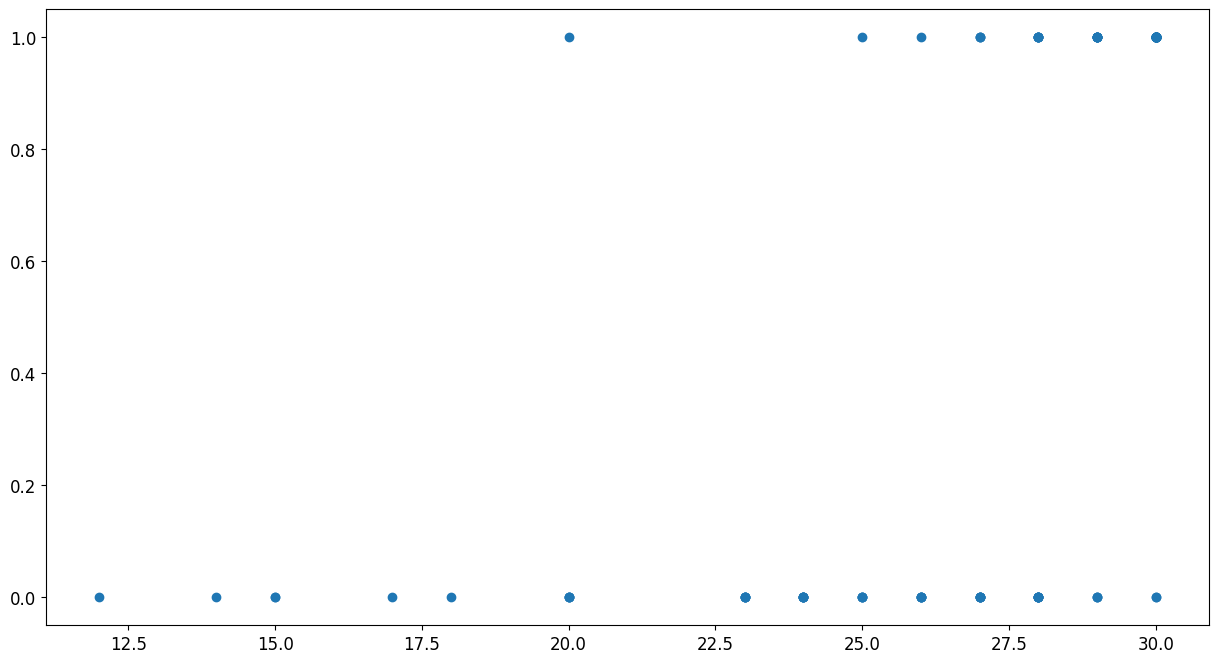

In [17]:
plt.scatter(X_test['total'],X_test['target'])

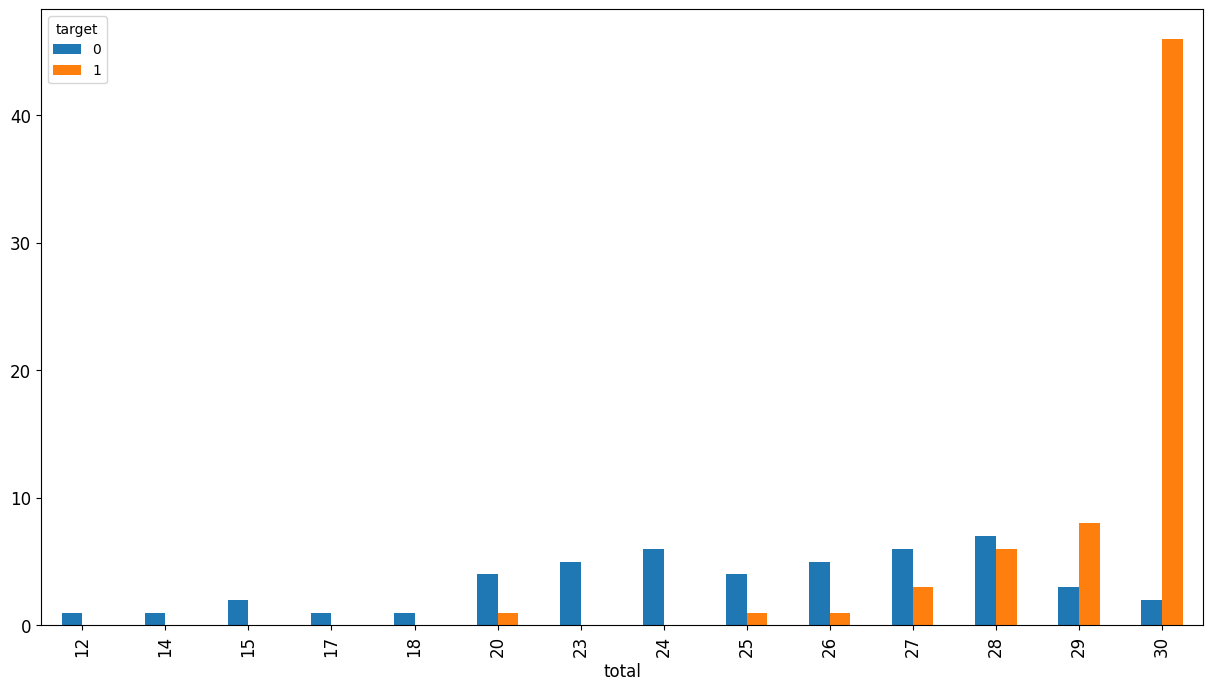

In [18]:
tmp_tst = X_test.groupby(['total','target']).agg({'target':'count'})
tmp_tst.columns=['count']
tmp_tst.reset_index(inplace=True)
tmp_tst.pivot(index='total',columns='target',values='count').plot(kind='bar');

In [19]:
X_test['pred']=X_test['total']>=b_best
accuracy=accuracy_score(X_test['target'],X_test['pred'])
accuracy

0.8157894736842105